In [1]:
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
import pygmo as pg

In [3]:
json_file = "range-combined.json"
j = json.load(open(json_file))

In [4]:
df = pd.json_normalize(j["data"])
df

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,range,weighted_combined,"[[50, 50.414, 564, 126, 175.5], [61, 74.248, 1...","[[0, 0, 0.922892, 1, 0], [1, 1, 0, 0.656863, 1...","[608.123, 329.784, 630.874, 608.123]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,"[[50, 52.07, 501, 75, 177.5], [50, 60.35, 254,...","[[0, 5.13621e-16, 0.738155, 0, 0], [0, 0.59852...","[608.123, 329.784, 630.874, 608.123]","[0.738155, 0.797589, 1, 1.02877, 0.797589, 1.7...",7878.050,"[50, 52.07, 501, 75, 177.5]","[0, 5.13621e-16, 0.738155, 0, 0]",541.612,0.738155,222
1,dao-map/ost004d.map,3111,3309,range,weighted_combined,"[[54, 54.828, 590, 140.5, 242], [60, 74.076, 2...","[[0, 0, 1, 0.868613, 0.764706], [1, 0.894091, ...","[657.515, 375.535, 621.069, 594.797]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,"[[54, 65.592, 253, 81, 229], [54, 68.076, 245,...","[[0, 0.272727, 0.32, 0, 0.727273], [0, 0.54545...","[657.515, 375.535, 621.069, 594.797]","[0.840063, 0.727827, 1.41421, 1.14612, 1.75946...",102.367,"[54, 68.076, 245, 81, 226]","[0, 0.545455, 0.16, 0, 0.454545]",353.854,0.727827,290
2,dao-map/ost004d.map,3366,4402,range,weighted_combined,"[[23, 30.038, 243, 60, 114], [36, 43.452, 110,...","[[0, 0, 1, 1, 0.040404], [1, 1, 0, 0.764706, 1...","[277.626, 210.434, 271.149, 270.687]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,"[[23, 30.038, 242, 34.5, 112], [23, 30.866, 24...","[[0, 0, 1, 0, 0], [0, 0.0617266, 0.992424, 0, ...","[277.626, 210.434, 271.149, 270.687]","[1, 0.994547, 0.300742, 0.350176, 0.453052, 2,...",1591.940,"[24, 31.452, 143, 36, 115.5]","[0.0769231, 0.105412, 0.25, 0.0769231, 0.0707071]",191.443,0.300742,141
3,dao-map/ost004d.map,4151,4286,range,weighted_combined,"[[28, 32.968, 324, 59, 133], [39, 46.866, 140,...","[[0, 0, 1, 0.507463, 0.193548], [1, 1, 0, 1, 1...","[357.794, 241.014, 328.87, 333.251]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,"[[28, 36.28, 206, 42, 124.5], [30, 37.452, 174...","[[0, 0.679431, 0.351562, 0, 0.0769231], [1, 1,...","[357.794, 241.014, 328.87, 333.251]","[0.768856, 1.71185, 1, 1.71185, 2, 1]",1641.110,"[28, 33.796, 289, 42, 124]","[0, 0, 1, 0, 0]",320.292,1.000000,143
4,dao-map/ost004d.map,3615,497,range,weighted_combined,"[[45, 62.802, 473, 84.5, 179], [74, 90.56, 227...","[[0, 0, 0.848276, 0.0752688, 0], [1, 1, 0, 1, ...","[518.536, 425.795, 559.391, 518.536]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,"[[46, 63.388, 423, 77.5, 183], [45, 62.802, 47...","[[0.0416667, 0.0272355, 0.781659, 0, 0.042328]...","[518.536, 425.795, 559.391, 518.536]","[0.784386, 1.00667, 0.858386, 0.883591, 0.6161...",1669.590,"[46, 63.388, 423, 77.5, 183]","[0.0416667, 0.0272355, 0.781659, 0, 0.042328]",473.876,0.784386,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,dao-map/lak100d.map,21061,8688,range,weighted_combined,"[[299, 348.68, 3037, 763, 1306.5], [303, 337.7...","[[0, 0.0785659, 0.871942, 0.77284, 0.561584], ...","[3423.95, 3404.06, 2170.42, 3413.75, 3578.06]","[1.29581, 1.14209, 2, 0.999286, 1.12631]",866574.00,...,"[[303, 350.196, 2360, 454.5, 1124], [303, 362....","[[0, 0.0370227, 0.531114, 0, 0.0414508], [0, 0...","[3423.95, 3404.06, 2170.42, 3413.75, 3578.06]","[0.534014, 0.389766, 0.427682, 1, 0.646351, 0....",129526.000,"[303, 350.196, 2360, 454.5, 1124]","[0, 0.0370227, 0.531114, 0, 0.0414508]",2693.320,0.534014,2029
2336,dao-map/lak100d.map,15863,6372,range,weighted_combined,"[[192, 239.196, 2036, 475, 821.5], [192, 238.3...","[[0, 0.0103981, 1, 0.671454, 0.411111], [0, 3....","[2267.13, 2274.37, 1456.15, 2139.31, 2056.99]","[1.27278, 1.3306, 2, 0.939336, 1.01975]",267127.00,...,"[[193, 240.61, 1533, 289.5, 736.5], [193, 238....","[[0, 0.

In [5]:
#expecting 156 maps names
maps = df['map-id'].unique()
len(maps)

156

In [6]:
#
# Overall Sparsity
#

In [7]:
# calculating the overall average sparsity
sparsity_df = df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
avg_gen_sparsity = sparsity_df.mean(axis=0)
avg_gen_sparsity

gen0-sparsity    651248.904443
gen1-sparsity    162101.107410
gen2-sparsity     57897.057228
gen3-sparsity     61042.401341
gen4-sparsity     51220.540246
gen5-sparsity     45973.913527
dtype: float64

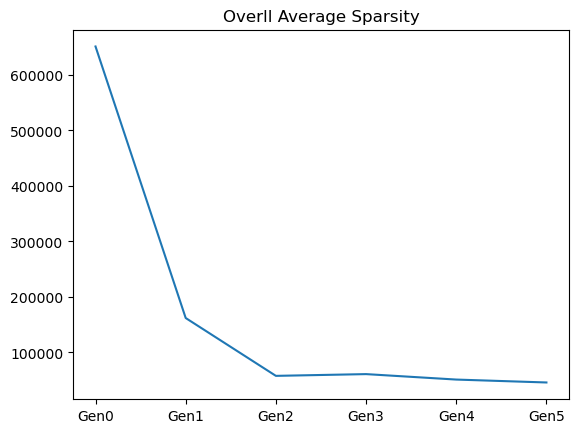

In [8]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = avg_gen_sparsity
ax.plot(x,y)
plt.title("Overll Average Sparsity")
plt.show()

In [9]:
# Percentage change across overall average
avg_gen_sparsity_list = avg_gen_sparsity.tolist()
avg_gen_sparsity_percentage_change = []
for i in range(1, len(avg_gen_sparsity_list)):
    avg_gen_sparsity_percentage_change.append((avg_gen_sparsity_list[i] - avg_gen_sparsity_list[i-1]) / avg_gen_sparsity_list[i-1] * 100)
avg_gen_sparsity_percentage_change

[-75.10919307448376,
 -64.28336724321382,
 5.432649367111799,
 -16.09022725173948,
 -10.243208473121282]

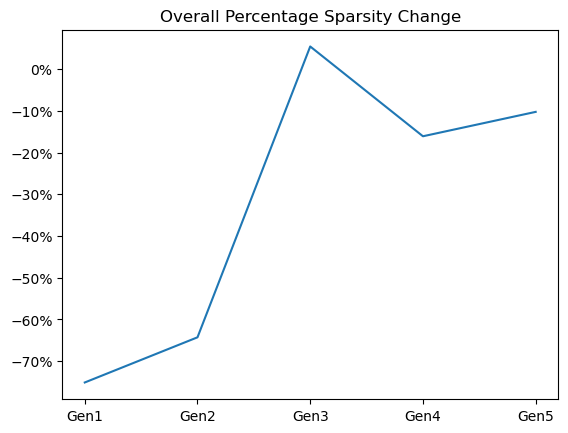

In [10]:
fig, ax = plt.subplots()
x = [1, 2, 3, 4, 5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = avg_gen_sparsity_percentage_change
ax.plot(x,y)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.title("Overall Percentage Sparsity Change")
plt.show()

In [11]:
# Averaging across all maps, is in order of the maps in the maps objecti
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_map_sparsity.append(map_df.mean(axis=0))

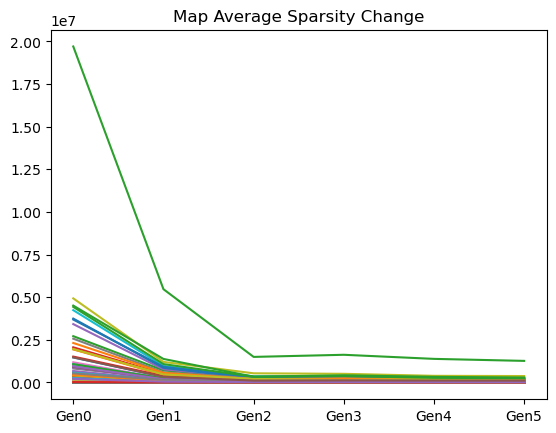

In [12]:
fig, ax = plt.subplots()
x = [0, 1, 2, 3, 4, 5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = np.array(avg_map_sparsity).T
ax.plot(x,y)
plt.title("Map Average Sparsity Change")
plt.show()

In [13]:
# show the sparisty distrabution across all maps for each generation 
avg_gen0_sparsity = []
avg_gen1_sparsity = []
avg_gen2_sparsity = []
avg_gen3_sparsity = []
avg_gen4_sparsity = []
avg_gen5_sparsity = []
for map_inst in avg_map_sparsity:
    avg_gen0_sparsity.append(map_inst["gen0-sparsity"])
    avg_gen1_sparsity.append(map_inst["gen1-sparsity"])
    avg_gen2_sparsity.append(map_inst["gen2-sparsity"])
    avg_gen3_sparsity.append(map_inst["gen3-sparsity"])
    avg_gen4_sparsity.append(map_inst["gen4-sparsity"])
    avg_gen5_sparsity.append(map_inst["gen5-sparsity"])

In [14]:
# want a list representing generations, of maps, key = map-id, value = vg sparsity

In [15]:
avg_gen0_sparsity
print(min(avg_gen0_sparsity))
print(max(avg_gen0_sparsity))

678.6242866666666
19703859.653333332


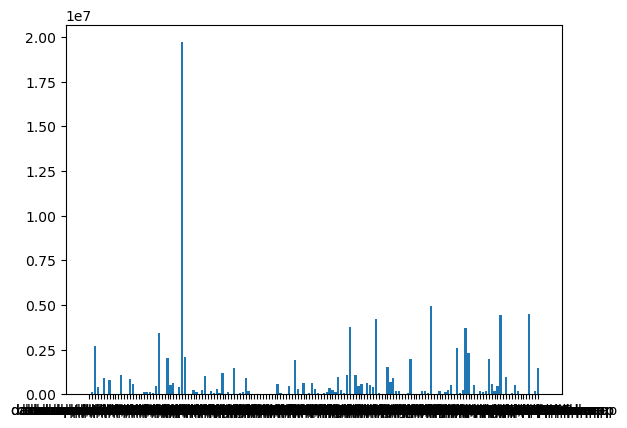

In [16]:
empty_array = [1]*156
plt.bar(maps, avg_gen0_sparsity)
plt.show()

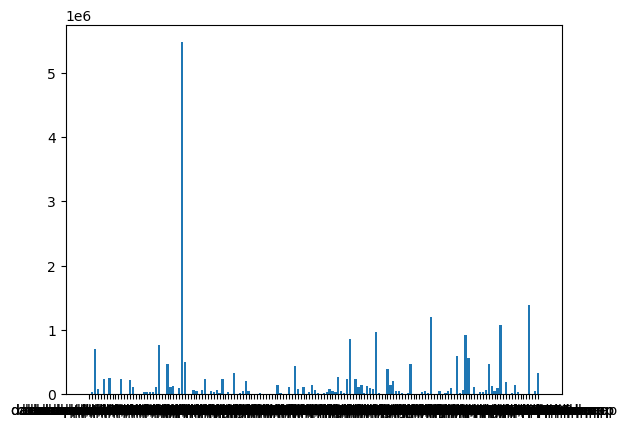

In [17]:
plt.bar(maps, avg_gen1_sparsity)
plt.show()

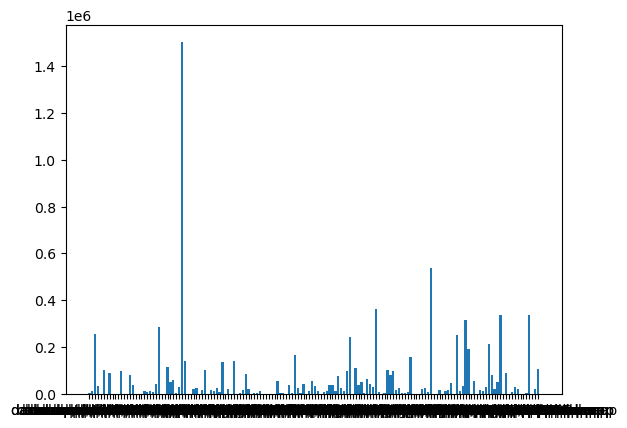

In [18]:
plt.bar(maps, avg_gen2_sparsity)
plt.show()

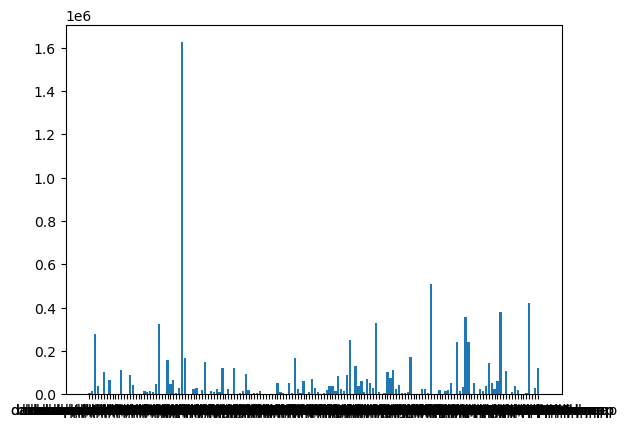

In [19]:
plt.bar(maps, avg_gen3_sparsity)
plt.show()

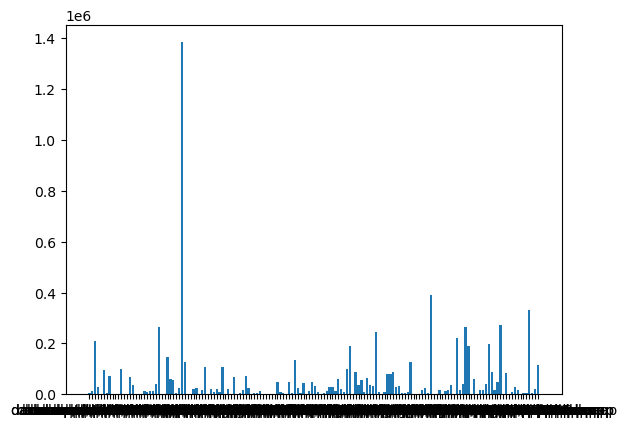

In [20]:
plt.bar(maps, avg_gen4_sparsity)
plt.show()

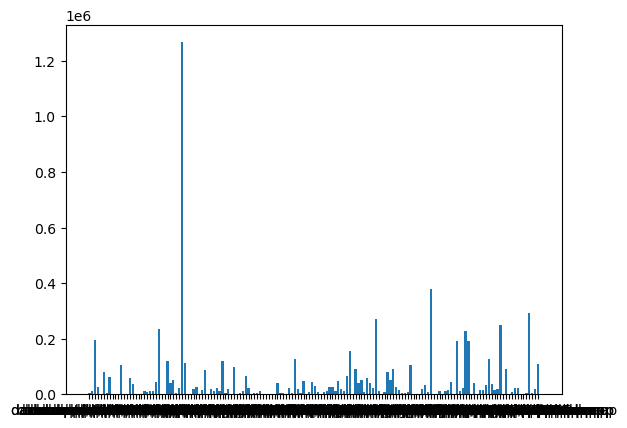

In [21]:
plt.bar(maps, avg_gen5_sparsity)
plt.show()

In [22]:
# 
# Hypervolume
#

In [23]:
# front must be a 2d matrix (?)
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [24]:
def map_avg_HV(df):
    map_avg_HV = []
    maps = df['map-id'].unique()
    for MAP in maps:
        map_df = df[df['map-id'] == MAP]
        fronts = map_df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
        HVs = []
        for index, row in fronts:
            HVs.append(front_hv(row))
        HVs = np.array(HVs).T
        avg_HVs = []
        for gen in HVs:
            avg_HVs.append(gen.mean())
        avg_HVs = np.array(avg_HVs).T
        map_avg_HV.append(avg_HVs)
    return map_avg_HV

In [25]:
# calculate the overall average generational hypervolume
def overall_gen_HV(df):
    gen_HV = []
    fronts = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    # iterate through all rows and record the generations fronts hypervolume
    for index, row in fronts.iterrows():
        row_HV = []
        for front in row:
            row_HV.append(front_hv(front))
            
        gen_HV.append(row_HV)
            
    gen_HV = np.array(gen_HV).T
    avg_gen_HV = []
    for gen in gen_HV:
        avg_gen_HV.append(gen.mean())

    return avg_gen_HV

In [26]:
overall_avg_HV = overall_gen_HV(df)
overall_avg_HV = np.array(overall_avg_HV).T
overall_avg_HV

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0]]


array([9.16266816e+15, 6.85187783e+15, 5.42092510e+15, 4.69020674e+15,
       5.00112137e+15, 4.74364929e+15])

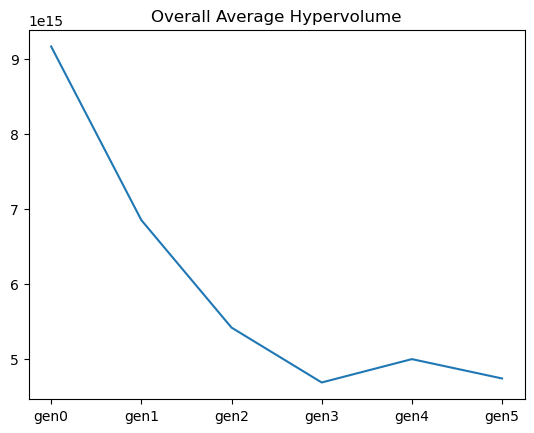

In [28]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = overall_avg_HV
ax.plot(x,y)
# add a y axis line for the A*Pex line
plt.title("Overall Average Hypervolume")
plt.show()

In [30]:
overall_avg_HV_percentage_change = []
for i in range(1, len(overall_avg_HV)):
    overall_avg_HV_percentage_change.append((overall_avg_HV[i] - overall_avg_HV[i-1]) / overall_avg_HV[i-1] * 100)
overall_avg_HV_percentage_change

[-25.21962266299907,
 -20.884095795770865,
 -13.479587732376789,
 6.6290176163735355,
 -5.148286976912675]

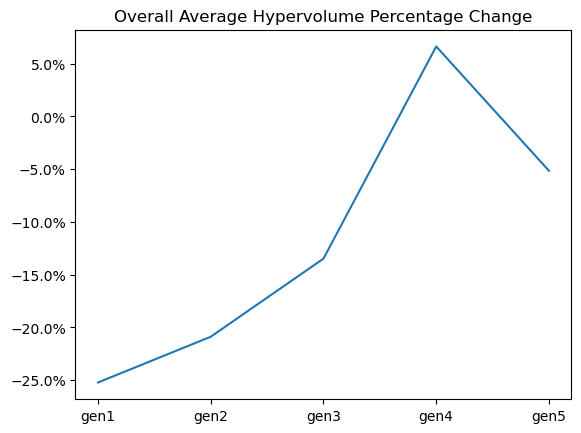

In [31]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = [ "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = np.array(overall_avg_HV_percentage_change).T
ax.yaxis.set_major_formatter(PercentFormatter())
ax.plot(x,y)
plt.title("Overall Average Hypervolume Percentage Change")
plt.show()

In [32]:
#
# d-score
#

In [33]:
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_map_sparsity.append(map_df.mean(axis=0))

In [34]:
#
# Represneative path
#

In [35]:
df.head()

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,range,weighted_combined,"[[50, 50.414, 564, 126, 175.5], [61, 74.248, 1...","[[0, 0, 0.922892, 1, 0], [1, 1, 0, 0.656863, 1...","[608.123, 329.784, 630.874, 608.123]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,"[[50, 52.07, 501, 75, 177.5], [50, 60.35, 254,...","[[0, 5.13621e-16, 0.738155, 0, 0], [0, 0.59852...","[608.123, 329.784, 630.874, 608.123]","[0.738155, 0.797589, 1, 1.02877, 0.797589, 1.7...",7878.050,"[50, 52.07, 501, 75, 177.5]","[0, 5.13621e-16, 0.738155, 0, 0]",541.612,0.738155,222
1,dao-map/ost004d.map,3111,3309,range,weighted_combined,"[[54, 54.828, 590, 140.5, 242], [60, 74.076, 2...","[[0, 0, 1, 0.868613, 0.764706], [1, 0.894091, ...","[657.515, 375.535, 621.069, 594.797]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,"[[54, 65.592, 253, 81, 229], [54, 68.076, 245,...","[[0, 0.272727, 0.32, 0, 0.727273], [0, 0.54545...","[657.515, 375.535, 621.069, 594.797]","[0.840063, 0.727827, 1.41421, 1.14612, 1.75946...",102.367,"[54, 68.076, 245, 81, 226]","[0, 0.545455, 0.16, 0, 0.454545]",353.854,0.727827,290
2,dao-map/ost004d.map,3366,4402,range,weighted_combined,"[[23, 30.038, 243, 60, 114], [36, 43.452, 110,...","[[0, 0, 1, 1, 0.040404], [1, 1, 0, 0.764706, 1...","[277.626, 210.434, 271.149, 270.687]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,"[[23, 30.038, 242, 34.5, 112], [23, 30.866, 24...","[[0, 0, 1, 0, 0], [0, 0.0617266, 0.992424, 0, ...","[277.626, 210.434, 271.149, 270.687]","[1, 0.994547, 0.300742, 0.350176, 0.453052, 2,...",1591.940,"[24, 31.452, 143, 36, 115.5]","[0.0769231, 0.105412, 0.25, 0.0769231, 0.0707071]",191.443,0.300742,141
3,dao-map/ost004d.map,4151,4286,range,weighted_combined,"[[28, 32.968, 324, 59, 133], [39, 46.866, 140,...","[[0, 0, 1, 0.507463, 0.193548], [1, 1, 0, 1, 1...","[357.794, 241.014, 328.87, 333.251]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,"[[28, 36.28, 206, 42, 124.5], [30, 37.452, 174...","[[0, 0.679431, 0.351562, 0, 0.0769231], [1, 1,...","[357.794, 241.014, 328.87, 333.251]","[0.768856, 1.71185, 1, 1.71185, 2, 1]",1641.110,"[28, 33.796, 289, 42, 124]","[0, 0, 1, 0, 0]",320.292,1.000000,143
4,dao-map/ost004d.map,3615,497,range,weighted_combined,"[[45, 62.802, 473, 84.5, 179], [74, 90.56, 227...","[[0, 0, 0.848276, 0.0752688, 0], [1, 1, 0, 1, ...","[518.536, 425.795, 559.391, 518.536]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,"[[46, 63.388, 423, 77.5, 183], [45, 62.802, 47...","[[0.0416667, 0.0272355, 0.781659, 0, 0.042328]...","[518.536, 425.795, 559.391, 518.536]","[0.784386, 1.00667, 0.858386, 0.883591, 0.6161...",1669.590,"[46, 63.388, 423, 77.5, 183]","[0.0416667, 0.0272355, 0.781659, 0, 0.042328]",473.876,0.784386,312


In [36]:
#overall average
norm_df = df.filter(["gen0-norm-winner", "gen1-norm-winner", "gen2-norm-winner", "gen3-norm-winner", "gen4-norm-winner", "gen5-norm-winner"])
rep_df = df.filter(["gen0-raw-winner", "gen1-raw-winner", "gen2-raw-winner", "gen3-raw-winner", "gen4-raw-winner", "gen5-raw-winner"])

In [37]:
norm_df

,gen0-norm-winner,gen1-norm-winner,gen2-norm-winner,gen3-norm-winner,gen4-norm-winner,gen5-norm-winner
0,"[0, 0.104221, 1, 0, 0.0508475]","[0, 0.0694806, 1, 0, 0.0338983]","[0, 0.0845243, 0.752358, 0, 0.043956]","[0, 5.46319e-16, 0.739454, 0, 0]","[0, 3.96155e-16, 0.752358, 0, 0]","[0, 5.13621e-16, 0.738155, 0, 0]"
1,"[0, 0.115385, 0.924933, 0, 0.676471]","[0, 0.5, 0.0965147, 0, 0.382353]","[0, 0.458333, 0.0481928, 0, 0.541667]","[0, 0.272727, 0.32, 0, 0.727273]","[0, 0.562987, 0.111821, 0, 0.307692]","[0, 0.545455, 0.16, 0, 0.454545]"
2,"[0, 0.0617266, 0.984962, 0, 0.020202]","[0, 0, 1, 0, 0]","[0.0769231, 0.105412, 0.25, 0.0588235, 0.0707071]","[0.166667, 0.325506, 0.220472, 0.0588235, 0.16...","[0, 0, 1, 0, 0]","[0.0769231, 0.105412, 0.25, 0.0769231, 0.0707071]"
3,"[0, 0.0595769, 0.853261, 0, 0.0752688]","[0, 0.238308, 0.358696, 0, 0.0107527]","[0, 0.238308, 0.358696, 0, 0.0107527]","[0, 0, 1, 0, 0]","[0, 0.190054, 0.442953, 0, 0.0107527]","[0, 0, 1, 0, 0]"
4,"[0, 0, 0.848276, 0.0752688, 0]","[0.0344828, 0.021111, 0.675862, 0, 0.0344828]","[0.0344828, 0.021111, 0.675862, 0, 0.0344828]","[0.333333, 0.333333, 0.323741, 0, 0.333333]","[0.142857, 0.101771, 0.671053, 0, 0.142857]","[0.0416667, 0.0272355, 0.781659, 0, 0.042328]"
...,...,...,...,...,...,...
2335,"[0.0119048, 0.142447, 0.906954, 0, 0.394428]","[0.047619, 0.178978, 0.315588, 0.0111111, 0.06...","[0.3, 0.0461865, 0.514415, 0.0918367, 0.030888]","[0, 0.0440676, 0.524626, 0, 0.0597015]","[0, 0.0434296, 0.522513, 0, 0.0592593]","[0, 0.0370227, 0.531114, 0, 0.0414508]"
2336,"[0, 0.0103981, 0.935865, 0, 0.08]","[0.0491803, 0.126058, 0.388638, 0.0466786, 0.0...","[0.0833333, 0.0950322, 0.501608, 0.00928793, 0...","[0.0625, 0.0788881, 0.521112, 0, 0.100775]","[0, 0.0719812, 0.501608, 0, 0.0842105]","[0, 0.0647077, 0.516129, 0, 0.0707965]"
2337,"[0.0148148, 0.109221, 0.98865, 0, 0.298969]","[0.037037, 0.0409141, 0.832736, 0.00657895, 0....","[0.6, 0.266112, 0.35644, 0.011335, 0.100313]","[0, 0.10275, 0.466954, 0, 0.0543478]","[0, 0.120192, 0.453004, 0, 0.0662252]","[0, 0.113755, 0.457801, 0, 0.0609756]"
2338,"[0, 0.11478, 0.916096, 0, 0.466667]","[0.0192308, 0.186751, 0.335616, 0.00548446, 0....","[0.166667, 0.0814443, 0.399445, 0.166667, 0.09...","[0.125, 0.0738569, 0.634269, 0, 0.0877193]","[0.05, 0.0509407, 0.437301, 0, 0.0609319]","[0.0909091, 0.250268, 0.421209, 0, 0.104712]"


In [38]:
#input is a column of 1 x n lists. returns a 1 x n list of the column wise average
def column_list_average(column):
    gen_costs_matrix = column.tolist()
    gen_cost_df = pd.DataFrame(gen_costs_matrix, columns = ["C1", "C2", "C3", "C4", "C5"])
    gen_cost_list = gen_cost_df.mean(axis=0).tolist()
    return gen_cost_list

In [39]:
average_gen_rep_path = []
for gen in norm_df:
    average_gen_rep_path.append(column_list_average(norm_df[gen]))
average_gen_rep_path

[[0.014692924004273505,
  0.07491717860683761,
  0.8939198953418804,
  0.05406544658119657,
  0.22200459370512818],
 [0.015587390495726496,
  0.16368415191025643,
  0.46693122713675217,
  0.029713137110256412,
  0.09916396696581198],
 [0.05269183264957265,
  0.2355841822606838,
  0.44898855806410254,
  0.04910432882051282,
  0.15586829632051283],
 [0.02873045799145299,
  0.19255125751282057,
  0.5145594826880342,
  0.04183627332905983,
  0.13866118905555552],
 [0.01913508264957265,
  0.17908940930341885,
  0.5052742362777778,
  0.041484295713675214,
  0.1218360915897436],
 [0.023222120811965813,
  0.17604691929914534,
  0.5276632553076923,
  0.04725486849145299,
  0.1256539544188034]]

In [40]:
average_gen_rep_path[0]

[0.014692924004273505,
 0.07491717860683761,
 0.8939198953418804,
 0.05406544658119657,
 0.22200459370512818]

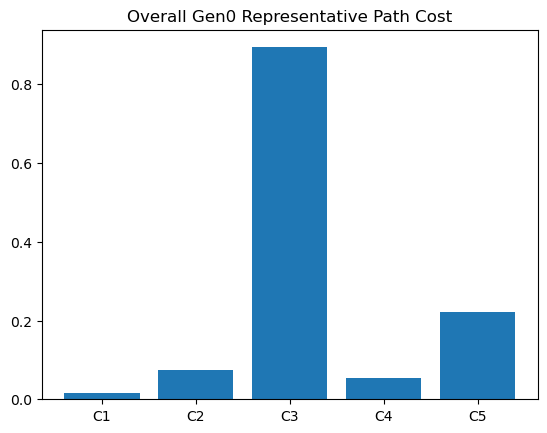

[0.014692924004273505, 0.07491717860683761, 0.8939198953418804, 0.05406544658119657, 0.22200459370512818]


In [41]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[0])
plt.title("Overall Gen0 Representative Path Cost")
plt.show()
print(average_gen_rep_path[0])

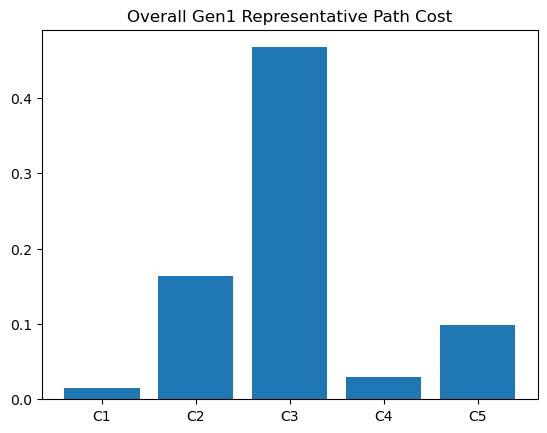

[0.015587390495726496, 0.16368415191025643, 0.46693122713675217, 0.029713137110256412, 0.09916396696581198]


In [42]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[1])
plt.title("Overall Gen1 Representative Path Cost")
plt.show()
print(average_gen_rep_path[1])

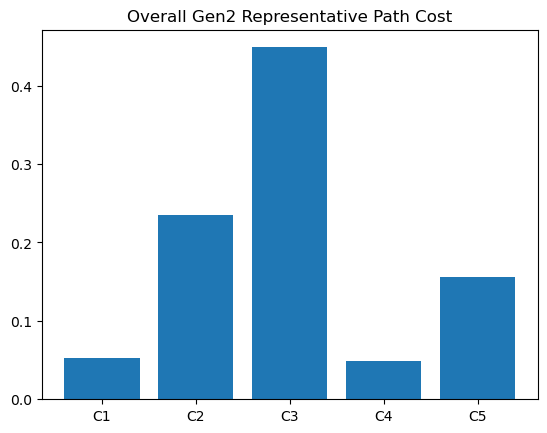

[0.05269183264957265, 0.2355841822606838, 0.44898855806410254, 0.04910432882051282, 0.15586829632051283]


In [43]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[2])
plt.title("Overall Gen2 Representative Path Cost")
plt.show()
print(average_gen_rep_path[2])

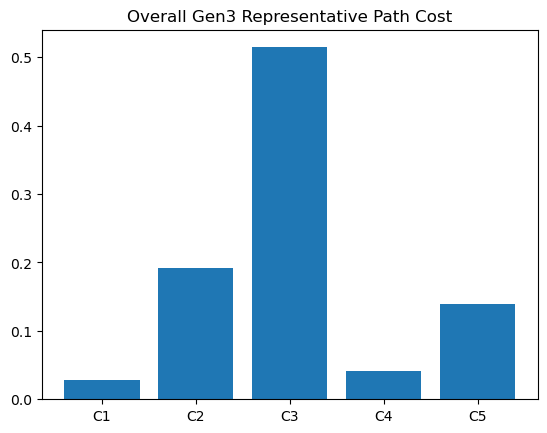

[0.02873045799145299, 0.19255125751282057, 0.5145594826880342, 0.04183627332905983, 0.13866118905555552]


In [44]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[3])
plt.title("Overall Gen3 Representative Path Cost")
plt.show()
print(average_gen_rep_path[3])

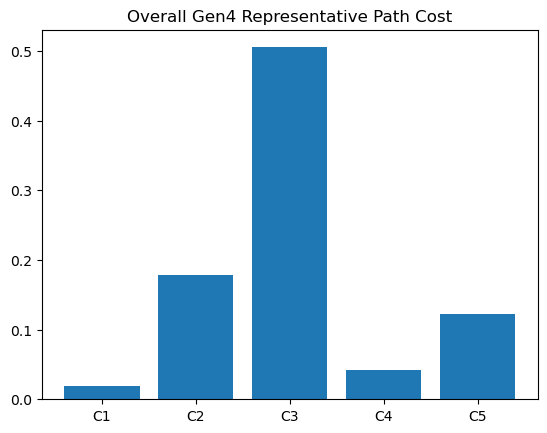

[0.01913508264957265, 0.17908940930341885, 0.5052742362777778, 0.041484295713675214, 0.1218360915897436]


In [45]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[4])
plt.title("Overall Gen4 Representative Path Cost")
plt.show()
print(average_gen_rep_path[4])

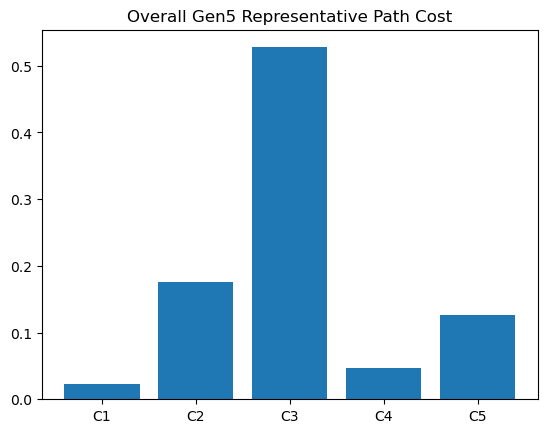

[0.023222120811965813, 0.17604691929914534, 0.5276632553076923, 0.04725486849145299, 0.1256539544188034]


In [46]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[5])
plt.title("Overall Gen5 Representative Path Cost")
plt.show()
print(average_gen_rep_path[5])

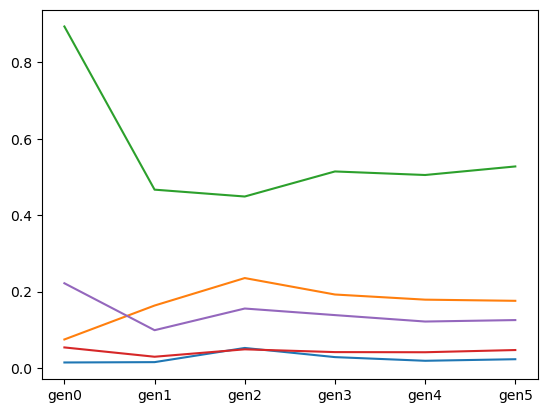

In [47]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = average_gen_rep_path
ax.plot(x,y)
plt.title("")
plt.show()

In [48]:
#problem: not all instnaces have the same size!
avg_map_d_score = []
avg_map_norm_d_score = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    raw_df = map_df.filter(["gen0-raw-d-score", "gen1-raw-d-score", "gen2-raw-d-score", "gen3-raw-d-score", "gen4-raw-d-score", "gen5-raw-d-score"])
    norm_df = map_df.filter(["gen0-norm-d-score", "gen1-norm-d-score", "gen2-norm-d-score", "gen3-norm-d-score", "gen4-norm-d-score", "gen5-norm-d-score"])
    for index, row in raw_df.iterrows():
        map_inst = []
        for gen in row:
            map_inst.append(np.array(gen).mean())
#            print(gen)
#            print(np.array(gen).mean())
#            print("-")
#        print("----")
        avg_map_d_score.append(np.array(map_inst).mean())


    break
        

In [49]:
#
# Run time
#

In [50]:
run_times = []
time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
for gen in time_df:
    run_times.append(time_df[gen].to_list())

In [66]:
time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
gen_time_avg = time_df.mean(axis=0)
gen_time_avg
# make some function for a cut off perior with input of the graph size.

gen0-time    982.541453
gen1-time    653.653419
gen2-time    751.431197
gen3-time    756.123932
gen4-time    756.055556
gen5-time    755.748291
dtype: float64

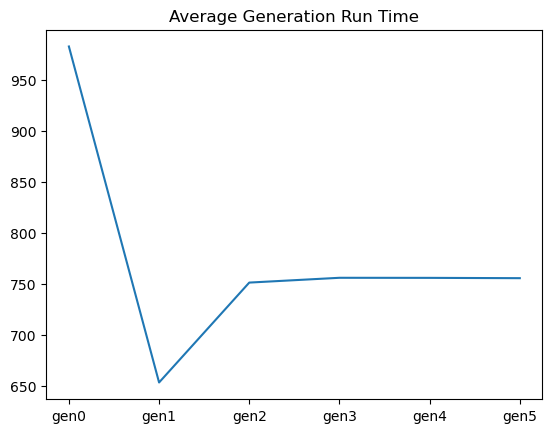

In [67]:
fig, ax = plt.subplots()
x = [0, 1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = np.array(gen_time_avg).T
ax.plot(x,y)
plt.title("Average Generation Run Time")
plt.show()